# How Internet Usage Affects Young People

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
%matplotlib inline

df = pd.read_csv('young-people-survey/responses.csv')
df.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow


In [4]:
list(df.columns)

['Music',
 'Slow songs or fast songs',
 'Dance',
 'Folk',
 'Country',
 'Classical music',
 'Musical',
 'Pop',
 'Rock',
 'Metal or Hardrock',
 'Punk',
 'Hiphop, Rap',
 'Reggae, Ska',
 'Swing, Jazz',
 'Rock n roll',
 'Alternative',
 'Latino',
 'Techno, Trance',
 'Opera',
 'Movies',
 'Horror',
 'Thriller',
 'Comedy',
 'Romantic',
 'Sci-fi',
 'War',
 'Fantasy/Fairy tales',
 'Animated',
 'Documentary',
 'Western',
 'Action',
 'History',
 'Psychology',
 'Politics',
 'Mathematics',
 'Physics',
 'Internet',
 'PC',
 'Economy Management',
 'Biology',
 'Chemistry',
 'Reading',
 'Geography',
 'Foreign languages',
 'Medicine',
 'Law',
 'Cars',
 'Art exhibitions',
 'Religion',
 'Countryside, outdoors',
 'Dancing',
 'Musical instruments',
 'Writing',
 'Passive sport',
 'Active sport',
 'Gardening',
 'Celebrities',
 'Shopping',
 'Science and technology',
 'Theatre',
 'Fun with friends',
 'Adrenaline sports',
 'Pets',
 'Flying',
 'Storm',
 'Darkness',
 'Heights',
 'Spiders',
 'Snakes',
 'Rats',
 'Agein

In [5]:
# Minimizing the dataframe to just our columns of interest
df= df[['Internet usage', 'Loneliness', 'Shopping', 'Shopping centres', 'Branded clothing', 'Entertainment spending','Spending on looks', 'Spending on gadgets', 'Spending on healthy eating', 'Happiness in life']]
df.head()

,Internet usage,Loneliness,Shopping,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Happiness in life
0,few hours a day,3.0,4.0,4.0,5.0,3.0,3.0,1,3.0,4.0
1,few hours a day,2.0,3.0,4.0,1.0,4.0,2.0,5,2.0,4.0
2,few hours a day,5.0,4.0,4.0,1.0,4.0,3.0,4,2.0,4.0
3,most of the day,5.0,4.0,4.0,3.0,3.0,4.0,4,1.0,2.0
4,few hours a day,3.0,3.0,3.0,4.0,3.0,3.0,2,4.0,3.0


#### Dealing with missing data

In [21]:
def preprocessing(df):
    """
    """
    # Data cleaning: 
    # There is one missing value on the Loneliness column. 
    # Since the row missing the Internet usage value will not help us answer our questions of interst, we can drop it
    df.dropna(axis=0, inplace=True, subset=["Internet usage"])
    
    #QUESTION 1
    df1 = df[['Internet usage', 'Loneliness']]
    # Data cleaning: 
    # There is one missing value on the Loneliness column. 
    # Since the row missing the Internet usage value will not help us answer our questions of interst, we can drop it
    df1.dropna(axis=0, inplace=True, subset=["Loneliness"])
    
    #QUESTION 2
    df2 = df[['Internet usage', 'Shopping', 'Shopping centres', 'Branded clothing', 'Entertainment spending','Spending on looks', 'Spending on gadgets', 'Spending on healthy eating']]
    #Since the data is missing from multiple columns, deleting records with missing values will impact the results of the remaining columns. Therefore, I will go with impuation.
    # https://scikit-learn.org/stable/modules/impute.html
    # Note: This needs to be modified; supposed to divide df2 into training and testing.. 

    imp = IterativeImputer(max_iter=10, random_state=0)
    df_training = df2[['Shopping', 'Shopping centres', 'Branded clothing', 'Entertainment spending','Spending on looks', 'Spending on gadgets', 'Spending on healthy eating']]
    imp.fit(df_training)
    df_training = pd.DataFrame(np.round(imp.transform(df_training)), columns=df_training.columns) 
    df_training.insert(0, "Internet usage", df2["Internet usage"])
    df_training
    df2 = df_training
    
    #QUESTION 3
    df3 = df[['Internet usage', 'Happiness in life']]
    # There are four missing values in the 'Happiness in life' column. 
    # Since the row missing the'Happiness in life' value will not help us answer our questions of interst, we can drop it
    df3.dropna(axis=0, inplace=True, subset=['Happiness in life'])

    
    
    return df1, df2, df3
    

#### Note: 
The plan is to use sub-dataframes for every question.

In [30]:
df1, df2, df3 = preprocessing(df)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


-----------------------------------------






### Question #1: 

We want to understand the relationship between loneliness and the number of hours spent on the internet

Columns of interest: Internet usage, Loneliness

In [23]:
df1.head()

,Internet usage,Loneliness
0,few hours a day,3.0
1,few hours a day,2.0
2,few hours a day,5.0
3,most of the day,5.0
4,few hours a day,3.0


#### Double-check for Missing Data:

In [24]:
df1.isna().sum()

Internet usage    0
Loneliness        0
dtype: int64

In [25]:
internet_loneliness = df1.groupby(['Internet usage']).mean()
internet_loneliness.sort_values(by='Loneliness')

,Loneliness
Internet usage,
less than an hour a day,2.582734
no time at all,2.666667
few hours a day,2.888291
most of the day,3.225806


In [26]:
ordered = internet_loneliness.reindex(['no time at all', 'less than an hour a day', 'few hours a day', 'most of the day'])

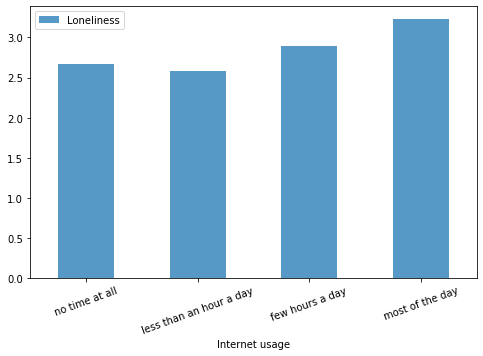

In [27]:
ordered.plot(kind='bar',alpha=0.75, rot=20, figsize=(8, 5))

### Conclusion

People who spend longer hours online tend to feel more lonely. 

**Note:** This conclusion does not explain the cause-effect relationship. It is unclear whether spending longer hours on the internet causes the person to feel lonelier, or if lonelier people spend longer hours on the internet to compensate for their loneliness through social media and online interactions.

------------------------------

### Question #2:

It is known that one of the most common ways in which websites make profit is through ads. There is also the social media influencers who often share content related to shopping, and -in some cases- possess various luxury items, which may encourage impulsive spending behavior. How does that influence internet users' shopping habits? Do users who spend longer hours online shop more? and what do they normally shop for?

In [31]:
df2.head()

,Internet usage,Shopping,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating
0,few hours a day,4.0,4.0,5.0,3.0,3.0,1.0,3.0
1,few hours a day,3.0,4.0,1.0,4.0,2.0,5.0,2.0
2,few hours a day,4.0,4.0,1.0,4.0,3.0,4.0,2.0
3,most of the day,4.0,4.0,3.0,3.0,4.0,4.0,1.0
4,few hours a day,3.0,3.0,4.0,3.0,3.0,2.0,4.0


#### Double-check for Missing Data:

In [32]:
df2.isnull().sum()

Internet usage                0
Shopping                      0
Shopping centres              0
Branded clothing              0
Entertainment spending        0
Spending on looks             0
Spending on gadgets           0
Spending on healthy eating    0
dtype: int64

In [33]:
internet_shopping = df2.groupby(['Internet usage']).mean()
internet_shopping = internet_shopping.reindex(['no time at all', 'less than an hour a day', 'few hours a day', 'most of the day'])
internet_shopping

,Shopping,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating
Internet usage,,,,,,,
no time at all,2.666667,3.000000,2.666667,2.333333,2.666667,2.333333,3.666667
less than an hour a day,3.280576,3.158273,2.870504,2.978417,2.949640,2.489209,3.489209
few hours a day,3.319892,3.271505,3.080645,3.204301,3.146505,2.865591,3.591398
most of the day,3.032258,3.104839,3.080645,3.475806,3.048387,3.338710,3.427419


In [34]:
xlabels = list(internet_shopping.index)
xlabels

['no time at all',
 'less than an hour a day',
 'few hours a day',
 'most of the day']

In [35]:
branded_clothing = [internet_shopping['Branded clothing'][x] for x in internet_shopping.index]
entertainment_spending = [internet_shopping['Entertainment spending'][x] for x in internet_shopping.index]
spending_looks = [internet_shopping['Spending on looks'][x] for x in internet_shopping.index]
spending_gadgets = [internet_shopping['Spending on gadgets'][x] for x in internet_shopping.index]
spending_healthy_eating = [internet_shopping['Spending on healthy eating'][x] for x in internet_shopping.index]

In [36]:
branded_clothing

[2.6666666666666665, 2.870503597122302, 3.0806451612903225, 3.0806451612903225]

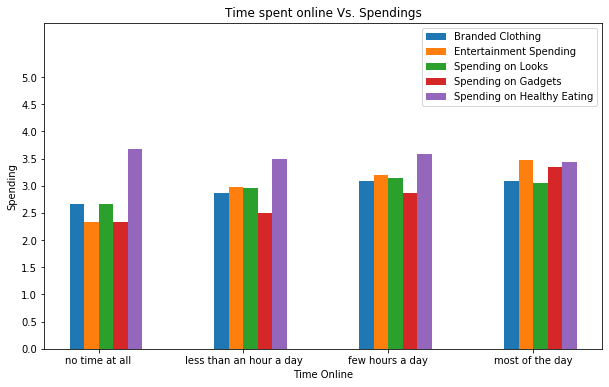

In [37]:
index = np.arange(4)
width = .1
plt.figure(figsize=(10,6))
plt.bar(index, branded_clothing, width, label="Branded Clothing")
plt.bar(index+width, entertainment_spending, width, label="Entertainment Spending")
plt.bar(index+width*2, spending_looks, width, label="Spending on Looks")
plt.bar(index+width*3, spending_gadgets, width, label="Spending on Gadgets")


plt.bar(index+width*4, spending_healthy_eating, width, label="Spending on Healthy Eating")
plt.xticks(index+width*3/2, xlabels, rotation=0)
plt.yticks(np.arange(0, 5.1, .5))
plt.ylim(0,6)
plt.title("Time spent online Vs. Spendings")
plt.xlabel("Time Online")
plt.ylabel("Spending")


plt.legend(loc='best')
plt.show()


The graph shows that time spent online has some influence on the spending habits of individuals. The more time a person spends online, the more likely they are to spend money on gadgets and entertainment. There is a positive correlation between time spent online and spending on looks, though it is not as strong as I initially assumed. 

It is also shown that users also tend to be more drawn to branded clothes the longer they spend on the internet. 

### Question #3:

We want to know if internet usage makes people less happy on average. 


In [38]:
df3.head()

,Internet usage,Happiness in life
0,few hours a day,4.0
1,few hours a day,4.0
2,few hours a day,4.0
3,most of the day,2.0
4,few hours a day,3.0


#### Handling Missing Data:

In [93]:
df3.isnull().sum()

Internet usage       0
Happiness in life    4
dtype: int64

In [95]:
internet_happiness = df3.groupby(['Internet usage']).mean()
internet_happiness = internet_happiness.reindex(['no time at all', 'less than an hour a day', 'few hours a day', 'most of the day'])
internet_happiness

,Happiness in life
Internet usage,
no time at all,3.666667
less than an hour a day,3.766423
few hours a day,3.745283
most of the day,3.403226


There doesn't seem to be a clear direct relationship between internet usage and happiness, whether positive or negative.